# Classification Problem
## Question to answer:
### Out of all the numerical variables, how important are budget and runtime in determining if a movie was awarded?

## Using DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree


dectree = DecisionTreeClassifier(max_depth = 3) 

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(numData_log, awards, test_size = (25/100), random_state = 42)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3140, 8) (3140, 1)
Test Set  : (1047, 8) (1047, 1)


[Text(558.0, 951.3000000000001, 'imdbRating <= 2.733\ngini = 0.41\nsamples = 3140\nvalue = [904, 2236]\nclass = Awarded'),
 Text(279.0, 679.5, 'BoxOffice <= 25.692\ngini = 0.491\nsamples = 1768\nvalue = [764, 1004]\nclass = Awarded'),
 Text(139.5, 407.70000000000005, 'imdbVotes <= 14.51\ngini = 0.495\nsamples = 1261\nvalue = [692, 569]\nclass = Not awarded'),
 Text(69.75, 135.89999999999998, 'gini = 0.449\nsamples = 456\nvalue = [301, 155]\nclass = Not awarded'),
 Text(209.25, 135.89999999999998, 'gini = 0.5\nsamples = 805\nvalue = [391, 414]\nclass = Awarded'),
 Text(418.5, 407.70000000000005, 'vote_count <= 10.065\ngini = 0.244\nsamples = 507\nvalue = [72, 435]\nclass = Awarded'),
 Text(348.75, 135.89999999999998, 'gini = 0.426\nsamples = 117\nvalue = [36, 81]\nclass = Awarded'),
 Text(488.25, 135.89999999999998, 'gini = 0.168\nsamples = 390\nvalue = [36, 354]\nclass = Awarded'),
 Text(837.0, 679.5, 'vote_count <= 11.105\ngini = 0.183\nsamples = 1372\nvalue = [140, 1232]\nclass = Awa

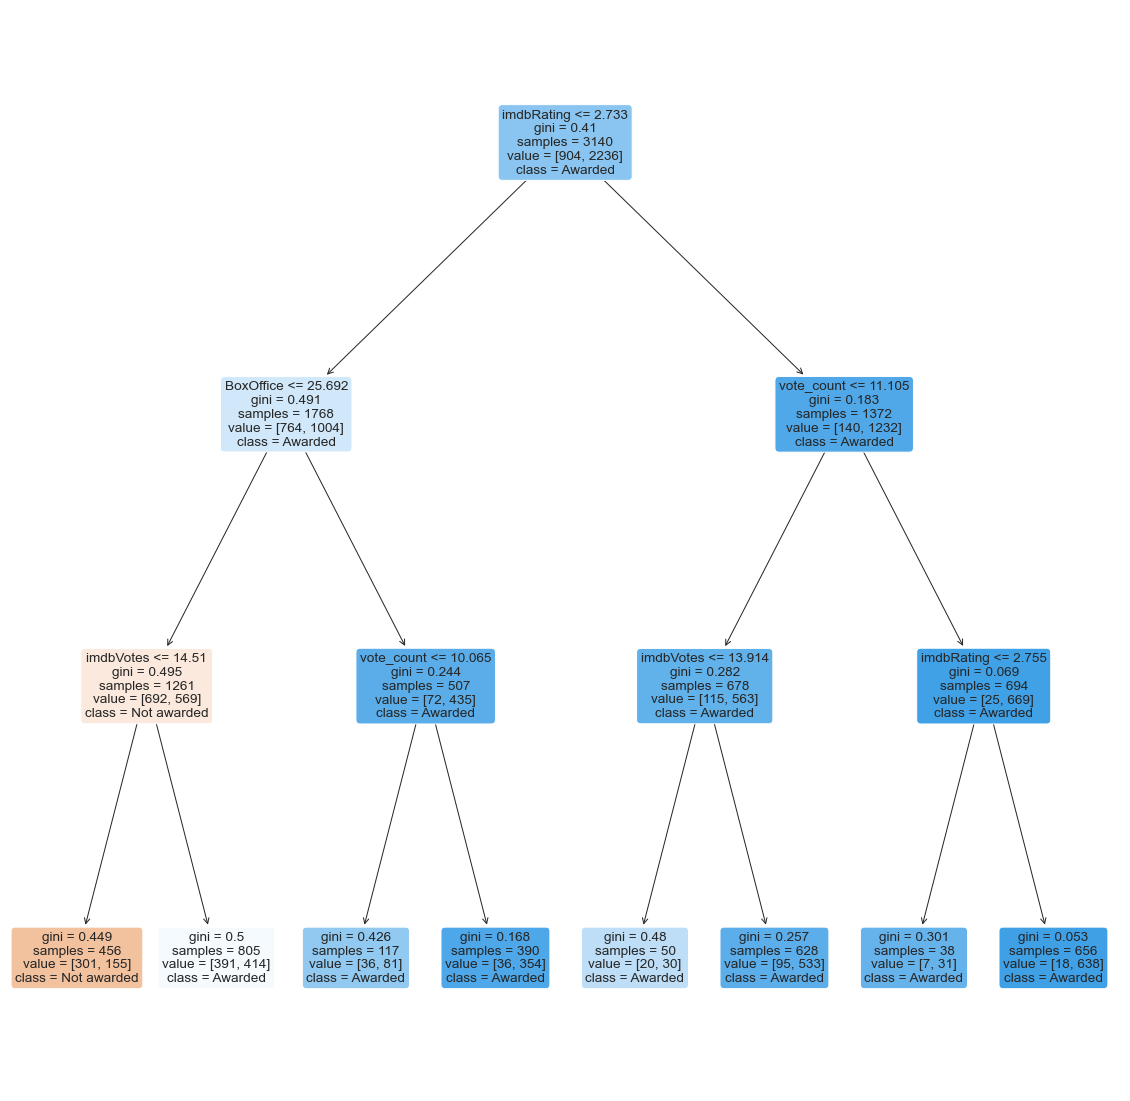

In [44]:
# train the decision tree model
dectree.fit(X_train, y_train)                   
f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Not awarded","Awarded"])

#### Calculating the accuracy of our model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7585987261146497

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7363896848137536



<AxesSubplot:>

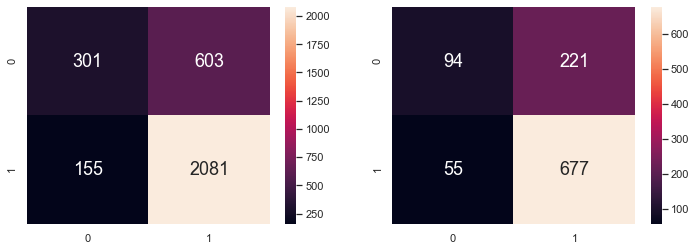

In [45]:
from sklearn.metrics import confusion_matrix

# Predict Awards corresponding to NumData_log
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Using RandomForestClassifier

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build multiple decision trees. The decision trees are then combined to get a more accurate and stable prediction.

We will be using the same data split.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,  # n_estimators denote number of trees
                                 max_depth = 4, random_state=0)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train) #using the same split of data

<ipython-input-46-50860a36a9d2>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train) #using the same split of data


RandomForestClassifier(max_depth=4, n_estimators=400, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7770700636942676

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7745940783190067



<AxesSubplot:>

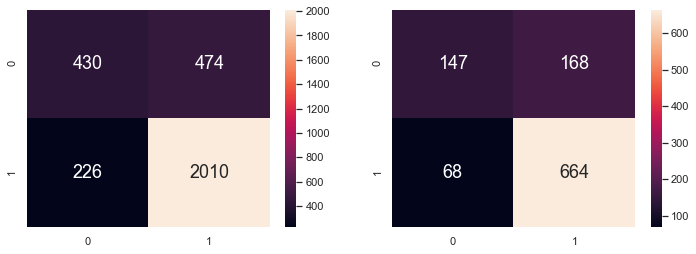

In [47]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [48]:
# Print the Accuracy Measures from the Confusion Matrix for test dataset
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.907103825136612
TNR Test :	 0.4666666666666667

FPR Test :	 0.5333333333333333
FNR Test :	 0.09289617486338798


Although classification accuracy increased, we observed that more than half the false data are being predicted as true. This is undesirable for a classification model.

The above phenomenon is due to the huge imbalance in our data set.

The majority class, in this case, Awarded movies, heavily influence our classification model, at the cost of ignoring the minority class, movies which did not receive awards.

Below, We will be sharing how we handled the imbalanced data.

## Method 1: Using class_weight parameter in RandomForestClassifier

In [49]:
#find the split of True and False values
awards.value_counts()

Awarded
True       2968
False      1219
dtype: int64

True class is approximately 3 times more prevalent than false class

In [50]:
weighted_rforest = RandomForestClassifier(n_estimators = 400, max_depth=4, random_state=0,class_weight={0:3,1:1})
weighted_rforest.fit(X_train, y_train)

<ipython-input-50-3cb07bc2a6d6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  weighted_rforest.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 3, 1: 1}, max_depth=4, n_estimators=400,
                       random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7315286624203822

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7411652340019103



<AxesSubplot:>

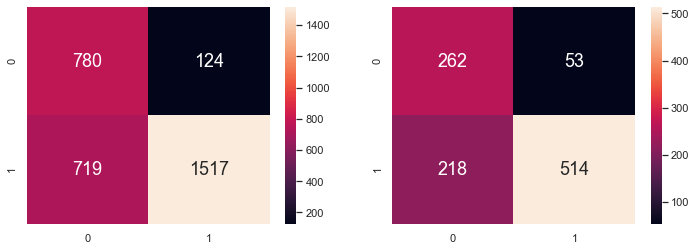

In [51]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = weighted_rforest.predict(X_train)
y_test_pred = weighted_rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", weighted_rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", weighted_rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [52]:
# Print the Accuracy Measures from the Confusion Matrix for train dataset
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

TPR Train :	 0.6784436493738819
TNR Train :	 0.8628318584070797

FPR Train :	 0.13716814159292035
FNR Train :	 0.3215563506261181


In [53]:
# Print the Accuracy Measures from the Confusion Matrix for test dataset
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.7021857923497268
TNR Test :	 0.8317460317460318

FPR Test :	 0.16825396825396827
FNR Test :	 0.2978142076502732


Although classification accuracy dropped, the false positive rate decreased, which is a good sign.

## Method 2: Using BalancedRandomForestClassifier

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators=400, max_depth=4, random_state=0)
brfc.fit(X_train, y_train)

<ipython-input-54-3fbbfaa1b93c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brfc.fit(X_train, y_train)


BalancedRandomForestClassifier(max_depth=4, n_estimators=400, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7398089171974522

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7459407831900668



<AxesSubplot:>

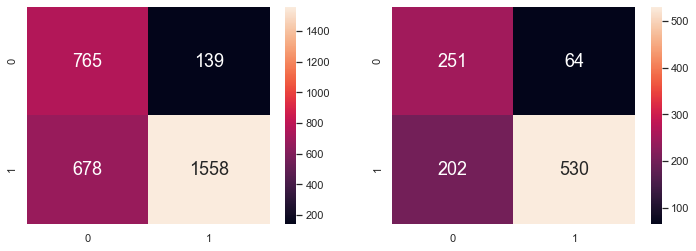

In [55]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = brfc.predict(X_train)
y_test_pred = brfc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", brfc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", brfc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The accuracy of BalancedRandomForestClassifier is similar to RandomForestClassifier with class_weight parameter.

Another way we can tackle imbalanced data is oversampling. Basically, we are randomly generating examples in the minority class to have a more balanced dataset.

## Method 3: RandomOverSampler

In [56]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("Number of records for X_train is ", X_train.shape)
print("Number of records for X_resampled oversampling is ",X_resampled.shape)

Number of records for X_train is  (3140, 8)
Number of records for X_resampled oversampling is  (4472, 8)


We must take note not to oversample the test data as doing that will artificially skew the accuracy of our model.

In [57]:
y_train.value_counts()

Awarded
True       2236
False       904
dtype: int64

In [58]:
y_resampled.value_counts()

Awarded
True       2236
False      2236
dtype: int64

We can see that the majority class and the minority class are now balanced.

In [59]:
#Using RandomForestClassifier again, but this time without the class_weight parameter
over_rforest = RandomForestClassifier(max_depth=4, n_estimators = 400, random_state=0)
over_rforest.fit(X_resampled, y_resampled)

<ipython-input-59-d75f149ca56a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  over_rforest.fit(X_resampled, y_resampled)


RandomForestClassifier(max_depth=4, n_estimators=400, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.771690518783542

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7421203438395415



<AxesSubplot:>

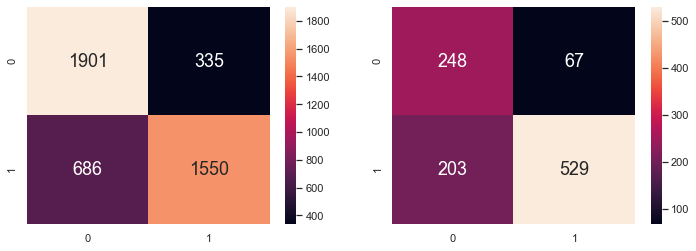

In [60]:
# Predict Awarded values corresponding to oversampled numData_log variables
y_resampled_pred = over_rforest.predict(X_resampled)
y_test_pred = over_rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", over_rforest.score(X_resampled, y_resampled))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", over_rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_resampled, y_resampled_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

By random over-sampling, the classification accuracy of the training dataset improved, but the classification accuracy of the test dataset remained the same. 

The above model highlights the issue of random oversampling.

Random over-sampling increases the weight of the minority class by replicating minority class examples. Hence, it does not increase the information provided by the train dataset. Instead, it raises an over-fitting issue. This issue causes the model to be too specific, giving us a higher classification accuracy for our training dataset, but not much improvement in terms of the test dataset.

## Method 4: Using SMOTE

To fix the over-fitting problem, we considered using the Synthetic Minority Over-sampling Technique (SMOTE).

Instead of replicating minority data, this method generates synthetic minority data, using the K-nearest neighbours of minority instances.

In [61]:
from imblearn.over_sampling import SMOTE
SMOTE_sampler = SMOTE(random_state=0)
X_smote_resampled, y_smote_resampled = SMOTE_sampler.fit_resample(X_train, y_train)
y_smote_resampled.value_counts()

Awarded
True       2236
False      2236
dtype: int64

Just like random oversampling, the minority class and majority class of our new training data set are now balanced.

In [62]:
smote_rforest = RandomForestClassifier(max_depth=4, n_estimators = 400, random_state=0)
smote_rforest.fit(X_smote_resampled, y_smote_resampled)

<ipython-input-62-56ce03a0e946>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  smote_rforest.fit(X_smote_resampled, y_smote_resampled)


RandomForestClassifier(max_depth=4, n_estimators=400, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.78108228980322

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7507163323782235



<AxesSubplot:>

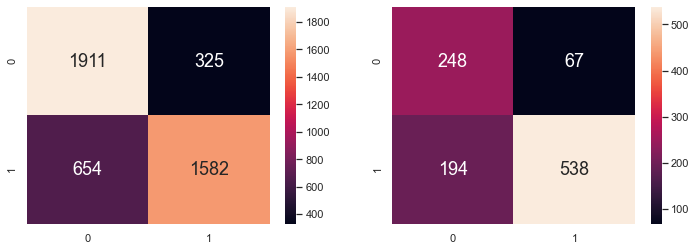

In [63]:
# Predict Awarded values corresponding to smote_resampled numData variables
y_smote_resampled_pred = smote_rforest.predict(X_smote_resampled)
y_test_pred = smote_rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", smote_rforest.score(X_smote_resampled, y_smote_resampled))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", smote_rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_smote_resampled, y_smote_resampled_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [206]:
# Print the Accuracy Measures from the Confusion Matrix for test dataset
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.7349726775956285
TNR Test :	 0.7873015873015873

FPR Test :	 0.2126984126984127
FNR Test :	 0.2650273224043716


The classification accuracy for both the training dataset and the test dataset improved. There's also an improvement in False Positive Rate, when compared to RandomForestClassifier model. It is safe to say that currently, this is the most suitable model.

## Hyperparameter tuning for RandomForestClassifier

#### Using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

#create a grid parameter
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
}

smote_rforest = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = smote_rforest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_smote_resampled, y_smote_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)

In [65]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 60, 'n_estimators': 500}

In [69]:
smote_rforest = RandomForestClassifier(max_depth=60, n_estimators = 500, random_state=0, bootstrap = True)
smote_rforest.fit(X_smote_resampled, y_smote_resampled)

<ipython-input-69-487d2b180ee7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  smote_rforest.fit(X_smote_resampled, y_smote_resampled)


RandomForestClassifier(max_depth=60, n_estimators=500, random_state=0)

## Finding feature importance of each numerical variable

Feature: 0.000000, Score: 0.09123
Feature: 1.000000, Score: 0.09730
Feature: 2.000000, Score: 0.09430
Feature: 3.000000, Score: 0.12490
Feature: 4.000000, Score: 0.12711
Feature: 5.000000, Score: 0.16389
Feature: 6.000000, Score: 0.13444
Feature: 7.000000, Score: 0.16684


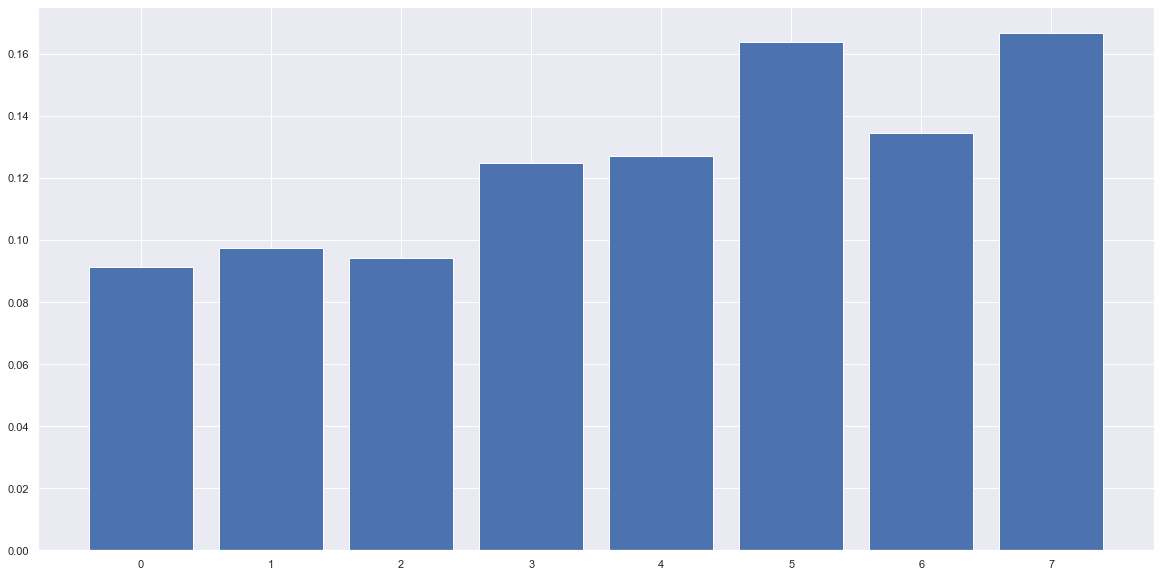

In [70]:
importance = smote_rforest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %f, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.yticks()
plt.show()

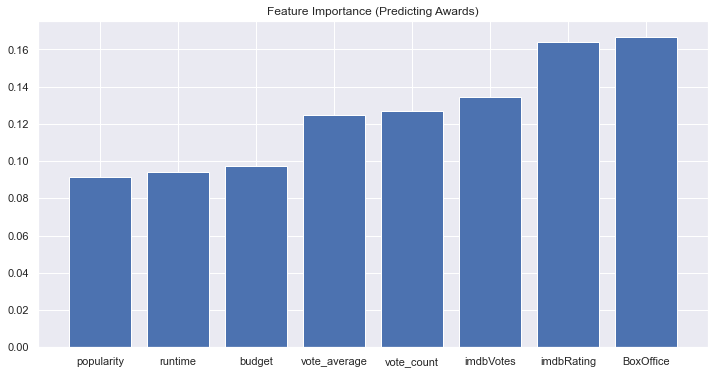

In [71]:
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))

plt.bar(pos,importance[sorted_idx], align='center')
plt.xticks(pos, np.array(X_smote_resampled.columns)[sorted_idx])
plt.title('Feature Importance (Predicting Awards)')
plt.show()

### Conclusion:

Out of all the numerical variables, the two that directors can control are runtime and budget. Based on the feature-importance graph above, compared to other variables, runtime and budget have lower relative importance when it comes to predicting whether a movie is awarded. To conclude, we will not advise directors to focus too much on finding the optimal budget and runtime, since both of them have minimal impact on the success of a movie. 